In [2]:
from pathlib import Path
import pickle

from re_index_notes import DocumentCollection, Document

path_to_index = Path("index.pkl")

with path_to_index.open("rb") as f:
        index: DocumentCollection = pickle.load(f)
        print(f"Loaded existing index with {len(index)} documents")


Loaded existing index with 59 documents


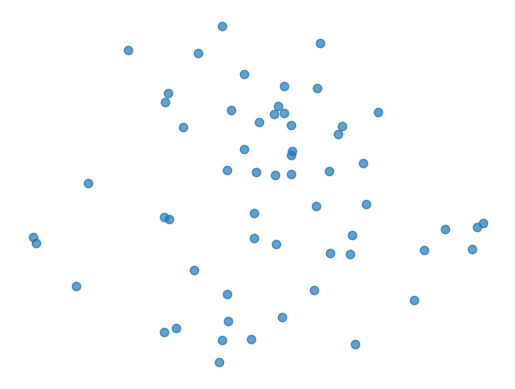

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.manifold as manifold

X = np.stack([doc.embedding.cpu().detach().numpy() for doc in index.values()], axis=0)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
X_tsne.shape

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
plt.axis("off")
plt.show()